<a href="https://colab.research.google.com/github/eemeidinger/loopy_copy/blob/main/loopy_copy_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from collections import OrderedDict
from warnings import filterwarnings

from matplotlib import pyplot as plt
from scipy import ndimage as ndi
from skimage import color, data, filters, graph, measure, morphology,io
from skimage.filters import threshold_otsu,threshold_li


In [ ]:
# In[deskew]:
def deskew(img):
    thresh=img
    edges = cv2.Canny(thresh,50,200,apertureSize = 3)

    lines = cv2.HoughLines(edges,1,np.pi/1000, 55)
    try:
        d1 = OrderedDict()
        for i in range(len(lines)):
            for rho,theta in lines[i]:
                deg = np.rad2deg(theta)
#                print(deg)
                if deg in d1:
                    d1[deg] += 1
                else:
                    d1[deg] = 1

        t1 = OrderedDict(sorted(d1.items(), key=lambda x:x[1] , reverse=False))
        print(list(t1.keys())[0],'Angle' ,thresh.shape)
        non_zero_pixels = cv2.findNonZero(thresh)
        center, wh, theta = cv2.minAreaRect(non_zero_pixels)
        angle=list(t1.keys())[0]
        if angle>160:
            angle=180-angle
        if angle<160 and angle>20:
            angle=12
        root_mat = cv2.getRotationMatrix2D(center, angle, 1)
        rows, cols = img.shape
        rotated = cv2.warpAffine(img, root_mat, (cols, rows), flags=cv2.INTER_CUBIC)

    except:
        rotated=img
        pass
    return rotated

def unshear(img):

    gray = img
    thresh = img.copy()
    #print(thresh)
    plt.imshow(thresh)
    plt.show()
    trans = thresh.transpose()

    arr=[]
    for i in range(thresh.shape[1]):
        arr.insert(0,trans[i].sum())

    arr=[]
    for i in range(thresh.shape[0]):
        arr.insert(0,thresh[i].sum())

    y = thresh.shape[0]-1-np.nonzero(arr)[0][0]
    y_top = thresh.shape[0]-1-np.nonzero(arr)[0][-1]

    trans1 = thresh.transpose()
    sum1=[]
    for i in range(trans1.shape[0]):
        sum1.insert(i,trans1[i].sum())

    height = y - y_top
    max_value = 255*height
    prev_num = len([i for i in sum1 if i>=(0.6*max_value)])
    final_ang = 0

    # # print(arr)
    # # print(x,y)
    for ang in range(-25,25,3):
        thresh = gray.copy()
        #print(thresh[0].shape)
        #print(ang)
        print('Ang',ang)
        if ang>0:
            #print(ang)
            for i in range(y):
                temp = thresh[i]
                move = int((y-i)*(math.tan(math.radians(ang))))
                if move >= temp.size:
                    move = temp.size
                thresh[i][:temp.size-move]=temp[move:]
                thresh[i][temp.size-move:] = [0 for m in range(move)]
        else:
            #print(ang)
            for i in range(y):
                temp = thresh[i]
                move = int((y-i)*(math.tan(math.radians(-ang))))
                if move >= temp.size:
                    move = temp.size
                #print(temp[:-3])
                #print(temp[:temp.size-move].shape, thresh[i][move%temp.size:].shape)
                thresh[i][move:]=temp[:temp.size-move]
                thresh[i][:move]=[0 for m in range(move)]

#         plt.imshow(thresh)
#         plt.show()
        trans1 = thresh.transpose()
        sum1=[]
        for i in range(trans1.shape[0]):
            sum1.insert(i,trans1[i].sum())
        #print(sum1)
        num = len([i for i in sum1 if i>=(0.60*max_value)])
        #print(num, prev_num)
        if(num>=prev_num):
            prev_num=num
            final_ang = ang
        #plt.imshow(thresh)
        #plt.show()
    #print("final_ang:", final_ang)

    thresh= gray.copy()
    if final_ang>0:
        for i in range(y):
            temp = thresh[i]
            move = int((y-i)*(math.tan(math.radians(final_ang))))
            if move >= temp.size:
                move = temp.size
            thresh[i][:temp.size-move]=temp[move:]
            thresh[i][temp.size-move:] = [0 for m in range(move)]
    else:
        for i in range(y):
            temp = thresh[i]
            move = int((y-i)*(math.tan(math.radians(-final_ang))))
            #print(move)
            if move >= temp.size:
                move = temp.size
            thresh[i][move:]=temp[:temp.size-move]
            thresh[i][:move]=[0 for m in range(move)]

    plt.imshow(thresh, cmap='gray_r')
    return thresh


Implementation

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving processed_image.png to processed_image.png


In [ ]:
img = cv2.imread('example_crop_1746.png')

In [ ]:
img.shape

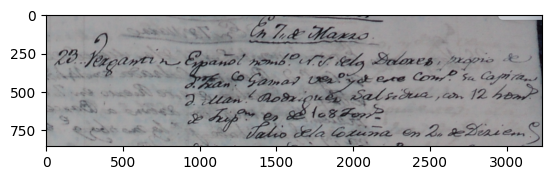

In [ ]:
plt.imshow(img)

In [ ]:
def image_processer_2(img):
  retina = img[:,:,:3]
  retina = color.rgb2gray(retina)
  t0,t1,t2,t3,t4 = filters.threshold_multiotsu(retina, classes=6)

  mask = (retina < t0)
  vessels = filters.sato(retina, sigmas=range(1, 10)) * mask
  thresholded = filters.apply_hysteresis_threshold(vessels, 0.01, 0.03)
  labeled = ndi.label(thresholded)[0]


  thresh = threshold_otsu(retina)
  binary = thresh > retina
  binary = unshear(binary * 255)
  plt.axis('off')
  plt.imshow(binary)
  plt.savefig('processed_image',dpi=300,bbox_inches='tight',pad_inches=0)
  return binary

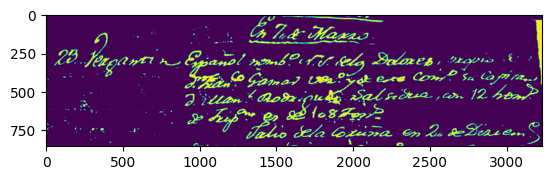

Ang -25
Ang -22
Ang -19
Ang -16
Ang -13
Ang -10
Ang -7
Ang -4
Ang -1
Ang 2
Ang 5
Ang 8
Ang 11
Ang 14
Ang 17
Ang 20
Ang 23


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

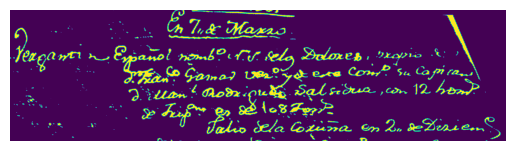

In [ ]:
image_processer_2(img)

In [ ]:
img2 = cv2.imread('processed_image.png')

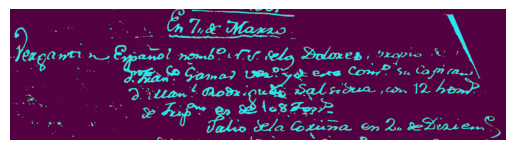

In [ ]:
plt.axis('off')
plt.imshow(img2)

### Connected Components

In [ ]:
import skimage

In [ ]:
def connected_components(img, sigma=1.0, t=0.5, connectivity=2):
    # load the image
    image = img
    # convert the image to grayscale
    gray_image = skimage.color.rgb2gray(image)
    # mask the image according to threshold
    binary_mask = gray_image > t
    # perform connected component analysis
    labeled_image, count = skimage.measure.label(binary_mask,
                                                 connectivity=connectivity, return_num=True)
    return labeled_image, count, binary_mask

In [ ]:
labeled_image, count, binary_mask= connected_components(img2)

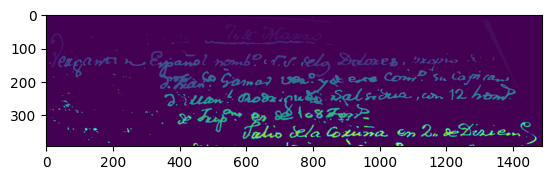

In [ ]:
plt.imshow(labeled_image)

In [ ]:
object_features = skimage.measure.regionprops(labeled_image)
object_areas = [objf["area"] for objf in object_features]

In [ ]:
min_area = 29

large_objects = []
for objf in object_features:
    if objf["area"] > min_area:
        large_objects.append(objf["label"])
print("Found", len(large_objects), "objects!")

Found 130 objects!


In [ ]:
for object_id, objf in enumerate(object_features, start=1):
    if objf["area"] < min_area :
        labeled_image[labeled_image == objf["label"]] = 0

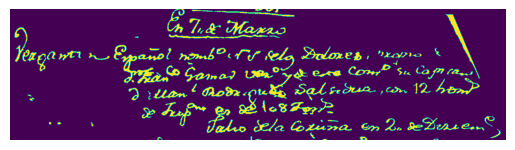

In [ ]:
object_mask = skimage.morphology.remove_small_objects(binary_mask,min_area)
plt.axis('off')
plt.imshow(object_mask)

In [ ]:
labeled_image, n = skimage.measure.label(object_mask,
                                         connectivity=2, return_num=True)

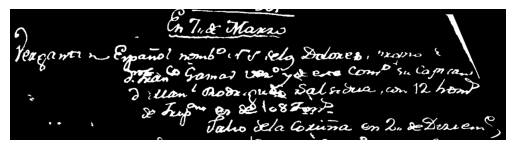

In [ ]:
thresh = threshold_otsu(labeled_image)
labeled_image = thresh*.002 > labeled_image
plt.axis('off')
plt.imshow(labeled_image,cmap = 'gray_r')
plt.savefig('cc_processed')


In [ ]:
img3 = cv2.imread('cc_processed.png')

In [ ]:
from skimage.measure import label, regionprops, regionprops_table

In [ ]:
from skimage.color.colorconv import rgb2gray
#object_features_filtered = skimage.measure.regionprops(img3)
img4 = rgb2gray(img3)
label_img = label(img4)
prop = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'axis_major_length',
                                                 'axis_minor_length',
                                                'perimeter'))

In [ ]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from skimage import data, filters, measure, morphology

# Binary image, post-process the binary mask and compute labels
threshold = filters.threshold_otsu(img4)
mask = img4 > threshold*0
labels = measure.label(mask)

fig = px.imshow(img4, binary_string=True)
fig.update_traces(hoverinfo='skip') # hover is only for label info

props = measure.regionprops(labels, img4)
properties = ['area', 'eccentricity', 'perimeter', 'intensity_mean']


# For each label, add a filled scatter trace for its contour,
# and display the properties of the label in the hover of this trace.
for index in range(1, labels.max()):
    label_i = props[index].label
    contour = measure.find_contours(labels == label_i, 0.5)[0]
    y, x = contour.T
    hoverinfo = ''
    for prop_name in properties:
        hoverinfo += f'<b>{prop_name}: {getattr(props[index], prop_name):.2f}</b><br>'
    fig.add_trace(go.Scatter(
        x=x, y=y, name=label_i,
        mode='lines', fill='toself', showlegend=False,
        hovertemplate=hoverinfo, hoveron='points+fills'))

plotly.io.show(fig)

In [ ]:
labels

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [ ]:
#horizontal lines over image
#storing the connected